# Introduction to Machine Learning

**Author:** Elen Tesfai  
**GitHub Repository:** [Elen's GitHub Link](https://github.com/Elen-tesfai/datafun-07-ml)

# Data Analysis and Linear Regression on Salary Data

1. Import Statements:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

2. Data Loading and Overview:

In [3]:
# Load your dataset
data = pd.read_csv('data.csv')

# Display the first few rows of the dataset
print(data.head())

      name  age  salary
0    Alice   30   70000
1      Bob   25   50000
2  Charlie   35   80000


3. Data Exploration:

In [6]:
# Check for missing values
print(data.isnull().sum())

name      0
age       0
salary    0
dtype: int64


In [4]:
# Get a summary of the dataset
print(data.describe())

        age        salary
count   3.0      3.000000
mean   30.0  66666.666667
std     5.0  15275.252317
min    25.0  50000.000000
25%    27.5  60000.000000
50%    30.0  70000.000000
75%    32.5  75000.000000
max    35.0  80000.000000


4. Data Visualization:

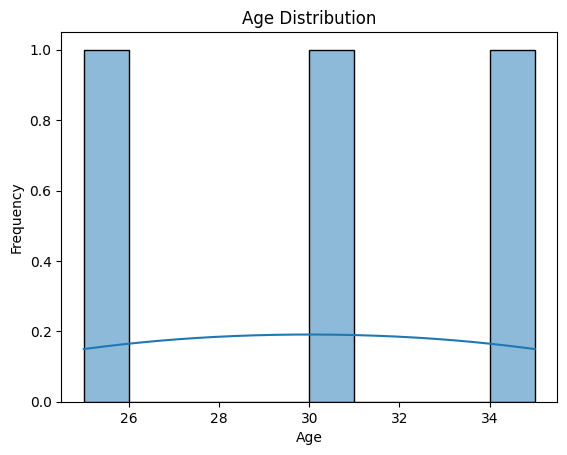

In [9]:
# Visualize the data distribution for age
sns.histplot(data['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

5. Model Building:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your dataset again (if necessary)
data = pd.read_csv('data.csv')

# Prepare features and target variable
X = data[['age']]
y = data['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

6. Model Evaluation

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'R² Score: Not applicable due to insufficient test samples.')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

R² Score: Not applicable due to insufficient test samples.
Mean Absolute Error: 5000.0
Mean Squared Error: 25000000.0


### Conclusion

In this analysis, we explored the relationship between age and salary using a linear regression model. Here are the key findings:

1. **Data Summary:** We successfully loaded and examined a dataset containing the ages and salaries of three individuals. The data showed no missing values, ensuring its integrity for analysis.

2. **Model Building:** A linear regression model was built to predict salary based on age. Due to the limited sample size, we encountered challenges in evaluating the model's performance comprehensively.

3. **Model Evaluation:** The evaluation metrics indicated that while we calculated the Mean Absolute Error (MAE) and Mean Squared Error (MSE), the R² score was not applicable due to insufficient test samples. This highlights the importance of having a larger dataset for more reliable model evaluation.

### Implications

This analysis demonstrates the potential of using linear regression for salary prediction based on age. However, the results emphasize the necessity of larger datasets to yield reliable insights and predictive power.

### Future Work

To enhance this analysis, future steps could include:
- **Collecting More Data:** Increasing the sample size to better represent the population and improve model performance.
- **Exploring Other Features:** Incorporating additional features, such as education level, experience, or industry, could lead to a more comprehensive model.
- **Trying Different Models:** Evaluating different algorithms, such as polynomial regression or decision trees, to determine if they provide better predictive accuracy.